## Raw Images

<img src="2.jpg" height="150" width="150">
<img src="3.jpg"height="150" width="150">
<img src="4.jpg"height="150" width="150">
<img src="7.jpg"height="150" width="150">


## Cropped images(cropped and removed background using photoshop)

<img src="croppedpng2.png" height="150" width="150">
<img src="croppedpng3.png"height="150" width="150">
<img src="croppedpng4.png"height="150" width="150">
<img src="croppedpng7.png"height="150" width="150">

## Converting these images to MNIST image format

In [4]:
import cv2
import numpy as np
import math
from scipy import ndimage

x_test2 = np.zeros((4,784))

correct_vals = np.zeros((4,10))

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

i = 0
for no in [2,3,4,7]:
    # read the image
    gray = cv2.imread("croppedpng"+str(no)+".png",0)

    # rescale it
    gray = cv2.resize(255-gray, (28, 28))
    # better black and white version
    (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape

    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        # first cols than rows
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        # first cols than rows
        gray = cv2.resize(gray, (cols, rows))

    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted

    # save the processed images
    cv2.imwrite("resizedim"+str(no)+".png", gray)
    """
    all images in the training set have an range from 0-1
    and not from 0-255 so we divide our flatten images
    (a one dimensional vector with our 784 pixels)
    to use the same 0-1 based range
    """
    flatten = gray.flatten() / 255.0
    """
    we need to store the flatten image and generate
    the correct_vals array
    correct_val for the first digit (9) would be
    [0,0,0,0,0,0,0,0,0,1]
    """
    x_test2[i] = flatten
    correct_val = np.zeros((10))
    correct_val[no] = 1
    correct_vals[i] = correct_val
    i += 1



## MNIST format images

<img src="resizedim2.png">
<img src="resizedim3.png">
<img src="resizedim4.png">
<img src="resizedim7.png">

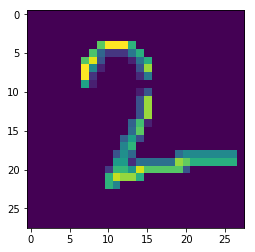

In [5]:
#visualising in graph
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test2[0].reshape(28,28))

In [6]:
y_test2=np.zeros(4)
y_test2[0]=2
y_test2[1]=3
y_test2[2]=4
y_test2[3]=7
x_test2 = x_test2.reshape(x_test2.shape[0], 28, 28,1)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


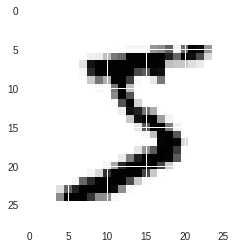

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.2013 - acc: 0.9435
Epoch 2/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0765 - acc: 0.9772
Epoch 3/10
 4032/60000 [=>............................] - ETA: 16s - loss: 0.0471 - acc: 0.985660000/60000 [==============================] - 17s 287us/step - loss: 0.0569 - acc: 0.9825
Epoch 4/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0471 - acc: 0.9851
Epoch 5/10
10624/60000 [====>.........................] - ETA: 13s - loss: 0.0326 - acc: 0.989660000/60000 [==============================] - 17s 284us/step - loss: 0.0372 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0317 - acc: 0.9902
Epoch 7/10
12032/60000 [=====>........................] - ETA: 13s - loss: 0.0214 - acc: 0.992860000/60000 [==============================] - 17s 286us/step - loss: 0.0250 - acc: 0.9921
Epoch 8/10
60000/60000 [==========

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.07641638516254279, 0.9829]


In [0]:
y_pred = model.predict(x_test2)

In [19]:
print(y_pred)
print(y_test2)

[[6.8295418e-13 4.8304167e-07 9.9999952e-01 2.2868467e-09 9.5551659e-14
  1.5299775e-10 4.1934580e-09 3.9205934e-11 3.2437495e-09 1.3497690e-12]
 [3.9034958e-17 8.5491419e-17 8.7967117e-10 9.9999988e-01 2.9656702e-18
  8.6067303e-10 2.5835021e-23 9.1515645e-10 4.4689347e-08 6.0253541e-08]
 [2.6899934e-07 1.1010365e-09 2.8022841e-02 5.0211810e-07 9.6836692e-01
  2.6463198e-07 3.5336444e-03 6.5161796e-05 3.2767825e-06 7.2066164e-06]
 [2.1878043e-14 5.2633641e-15 1.9505677e-13 3.4482049e-08 3.1717202e-11
  2.7704599e-13 2.1124791e-18 1.0000000e+00 1.0976853e-09 3.2264719e-10]]
[2. 3. 4. 7.]


<img src="highlighted results.jpg" height=200 width=650>

### Reference : http://opensourc.es/blog/tensorflow-mnist